In [27]:
# Librerias a utilizar en el EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from pandas_datareader import data as pdr
import yfinance as yfin
import datetime as dt
from datetime import datetime
import seaborn as sns
from IPython.display import display, HTML

In [3]:
# Extraer datos de la carpeta 'raw'
df_gdp = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\gdp.csv',index_col=0, header=0)
df_inflation = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\inflation.csv',index_col=0, header=0)
df_interest_rate_yld = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\interest_rate_yld.csv',index_col=0, header=0)
df_interest_rates = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\interest_rates.csv',index_col=0, header=0)
df_unemployment = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\unemployment.csv',index_col=0, header=0)
df_usd = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\usd.csv',index_col=0, header=0)
df_market_hist = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\market_hist.csv',index_col=0, header=0)
df_market_rets = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\market_rets.csv',index_col=0, header=0)
df_market_cum = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\market_cum.csv',index_col=0, header=0)


### Análisis Univariante

In [4]:
indicators = {"gdp":df_gdp, "inflation":df_inflation, "interest_rate_yld":df_interest_rate_yld, 
              "interest_rates":df_interest_rates, "unemployment":df_unemployment, "usd":df_usd, 
              "market_hist":df_market_hist, "market_rets":df_market_rets, "market_cum":df_market_cum}
medidas = ["mean", "median", "mode", "q0", "q1", "q2", "q3", "var", "std", "skew", "kurt"]
indicators = {"gdp":df_gdp}

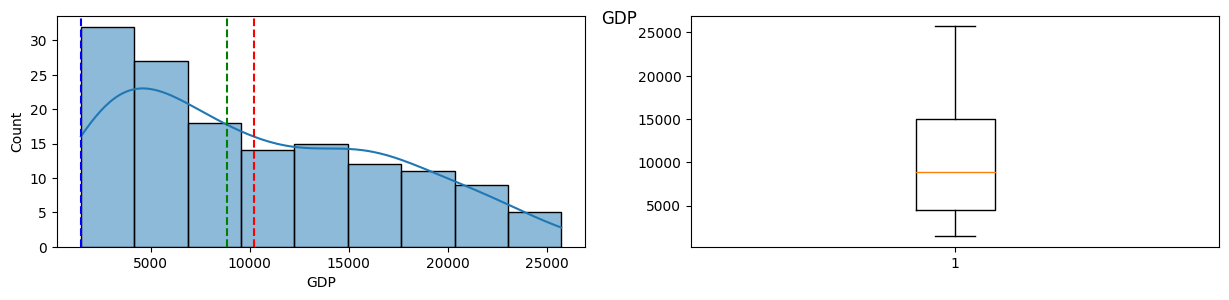

,GDP
mean,1.019248e+04
median,8.866480e+03
mode,1.476289e+03
q0,1.476289e+03
q1,4.475994e+03
q2,8.866480e+03
q3,2.572394e+04
var,4.401823e+07
std,6.634623e+03
skew,4.786000e-01


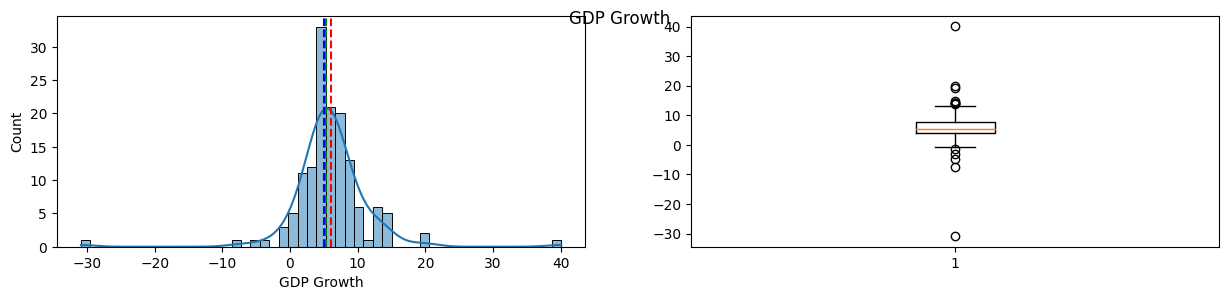

,GDP Growth
mean,5.9937
median,5.3000
mode,5.0000
q0,-30.9000
q1,4.1000
q2,5.3000
q3,40.1000
var,33.6823
std,5.8036
skew,-0.2630


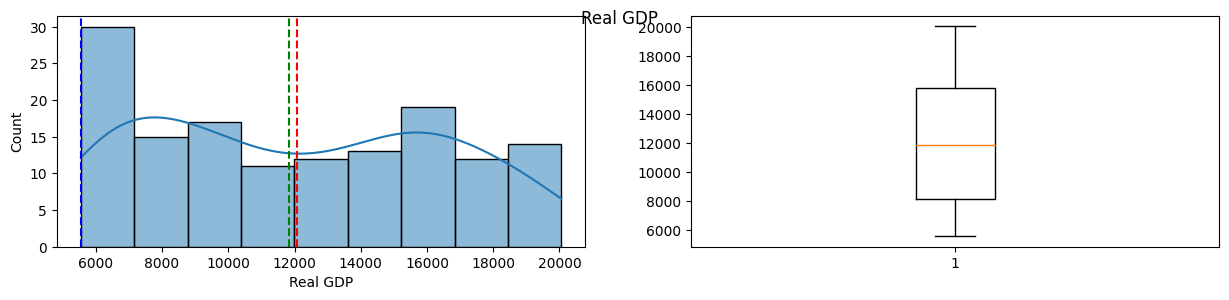

,Real GDP
mean,1.206613e+04
median,1.183988e+04
mode,5.551713e+03
q0,5.551713e+03
q1,8.116122e+03
q2,1.183988e+04
q3,2.005466e+04
var,1.973817e+07
std,4.442766e+03
skew,1.278000e-01


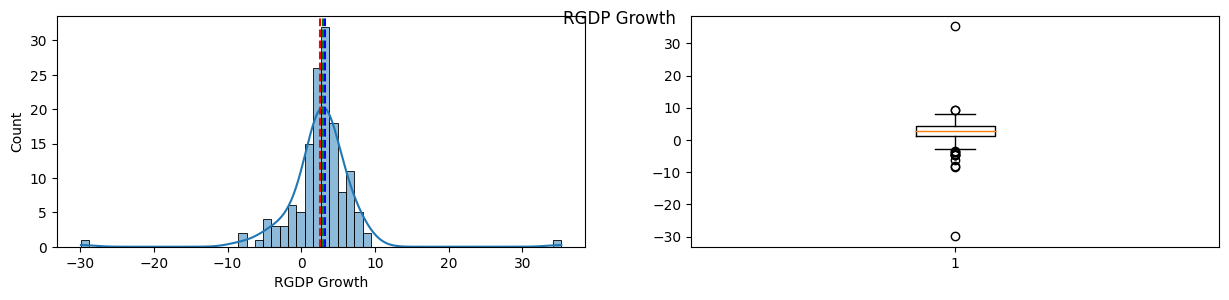

,RGDP Growth
mean,2.5531
median,2.9000
mode,3.2000
q0,-29.9000
q1,1.2500
q2,2.9000
q3,35.3000
var,25.0643
std,5.0064
skew,-0.1567


In [37]:
df_medidas = pd.DataFrame(index=medidas)
for inds, df in indicators.items():

    # print(inds)
    # print("-------")

    # Definir el numero de filas del subplot
    sub_rows = int((len(df.columns))/3) 
    if sub_rows == 0:
        sub_rows = 1
    
    # Definir el numero de bins
    n_bin = int(len(df)/25)
    if n_bin < 10:
        n_bin = 10
    elif n_bin > 50:
        n_bin = 50
    
    if inds == "market_cum" or inds == "market_hist":
        pass # Pasar para esos dos indicadores 
    else:
        for n, indicator in enumerate(df.columns):
            # print(f"{indicator}")
            # Definir las medidas de Posicion
            # print("- Medidas de Posicion")
            mean = df[indicator].mean()
            # print(f"\tLa media es {mean.round(4)}")
            mode = df[indicator].mode()
            # print(f"\tLa moda es {mode[0].round(4)}")
            median = df[indicator].median()
            # print(f"\tLa mediana es {median.round(4)}")

            # Definir los cuartiles
            # print("- Cuartiles")
            q0 = df[indicator].quantile(0)
            # print(f"\tEl percentil 0 es {q0.round(4)}")
            q1 = df[indicator].quantile(0.25)
            # print(f"\tEl percentil 25 es {q1.round(4)}")
            q2 = df[indicator].quantile(0.50)
            # print(f"\tEl percentil 50 es {q2.round(4)}")
            q3 = df[indicator].quantile(0.75)
            # print(f"\tEl percentil 75 es {q3.round(4)}")
            q3 = df[indicator].quantile(1)
            # print(f"\tEl percentil 100 es {q3.round(4)}")

            # Definir las medidas de Variabilidad
            # print("- Medidas de Variabilidad")
            var = df[indicator].var()
            # print(f"\tLa varianza es {var.round(4)}")
            std = df[indicator].std()
            # print(f"\tLa desviacion estandar es {std.round(4)}")

            # Definir las medidas de Forma
            # print("- Medidas de Forma")
            skew = df[indicator].skew()
            # print(f"\tLa desviacion estandar es {skew.round(4)}")
            kurt = df[indicator].kurt()
            # print(f"\tLa desviacion estandar es {kurt.round(4)}")

            data = [mean, median, mode[0], q0, q1, q2, q3, var, std, skew, kurt]

            df_medidas[indicator] = pd.Series(data=data,index = medidas,name=indicator)
            
            medidas_tup = zip(medidas, data)
            # Convert tup to a multi-line string
            medidas_str = "\n".join([f"{k}: {v}" for k, v in medidas_tup])

            # print("------------------------------------------------------------------")

            fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
            fig.suptitle(indicator, fontsize=12, y=0.9)
            plt.subplots_adjust(hspace=1)
            sns.histplot(df[indicator], kde=True, ax=axs[0])
            axs[0].axvline(mean, color="red", linestyle="--")
            axs[0].axvline(median, color="green", linestyle="--")
            axs[0].axvline(mode[0], color="blue", linestyle="--")
            # axs[0].text(0.5, 0, medidas_str, fontsize=12, color='red', ha='center', va='bottom', transform=axs[0].transAxes)

            axs[1].boxplot(df[indicator])
            plt.close(fig)

            # Create an HTML table
            table = HTML(pd.DataFrame(df_medidas[indicator].round(4)).to_html(index=True))

            # Display the chart and table side by side
            display(fig, table,)


In [33]:
import matplotlib.pyplot as plt

# Generate some data for the chart
x = [1, 2, 3, 4, 5]
y = [10, 8, 6, 4, 2]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data on the axis
ax.plot(x, y)

# Save the figure as a variable
chart = plt.gcf()

# Close the figure to prevent it from being displayed
plt.close(fig)

# Now you can access the chart variable, which contains the chart data, as needed
print(chart)


Figure(640x480)


45